In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time as time
%matplotlib inline

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['legend.handlelength'] = 1.0

In [3]:
filename = '04.11.2022, 15.09,  434.92431921 THz.xlsx'
sheetname = '04.11.2022, 15.09,  434.9243192'
row_start = 71
row_end = 44511

df = pd.read_excel(filename,sheet_name=sheetname,header=int(row_start)-2,nrows=int(row_end)-int(row_start)+1)

In [4]:
df

,127.2311,-3,-99930819333333328,Unnamed: 3,Unnamed: 4
0,1.593086e+02,689.274525,4.349391e+14,NaN,NaN
1,1.913494e+02,689.274524,4.349391e+14,NaN,NaN
2,2.234657e+02,689.274525,4.349391e+14,NaN,NaN
3,2.736272e+02,689.274524,4.349391e+14,NaN,NaN
4,3.236020e+02,689.274524,4.349391e+14,NaN,NaN
...,...,...,...,...,...
44436,1.316852e+07,689.297990,4.349243e+14,NaN,NaN
44437,1.316865e+07,689.297990,4.349243e+14,NaN,NaN
44438,1.316878e+07,689.297991,4.349243e+14,NaN,NaN
44439,1.316891e+07,689.297990,4.349243e+14,NaN,NaN


In [5]:
## Change column name for df.plot

df.columns = ['time / ms','wavelength / nm','frequency / THz','b','c'] # rename ([] and _ cannot be processed by LaTeX weird.. space is ok)
df

,time / ms,wavelength / nm,frequency / THz,b,c
0,1.593086e+02,689.274525,4.349391e+14,NaN,NaN
1,1.913494e+02,689.274524,4.349391e+14,NaN,NaN
2,2.234657e+02,689.274525,4.349391e+14,NaN,NaN
3,2.736272e+02,689.274524,4.349391e+14,NaN,NaN
4,3.236020e+02,689.274524,4.349391e+14,NaN,NaN
...,...,...,...,...,...
44436,1.316852e+07,689.297990,4.349243e+14,NaN,NaN
44437,1.316865e+07,689.297990,4.349243e+14,NaN,NaN
44438,1.316878e+07,689.297991,4.349243e+14,NaN,NaN
44439,1.316891e+07,689.297990,4.349243e+14,NaN,NaN


## Using df.plot to plot

In [6]:
## Filter unwanted data

# df = df[df["wavelength / nm"] > 0] #filter out -3 in wavelength
# df = df[df["wavelength / nm"] > 689] #filter out in wavelength
# df = df[df["wavelength / nm"] < 689.65] #filter out in wavelength

In [7]:
## Convert ms to s

df.iloc[:,0] = df.iloc[:,0]/1000 #convert ms to s

## Convert freq from Hz to THz

df.iloc[:,2] = df.iloc[:,2]/1e12 #convert Hz to THz

## Rename again 

df.columns = ['time / s','wavelength / nm','frequency / THz','b','c']

In [8]:
df

,time / s,wavelength / nm,frequency / THz,b,c
0,0.159309,689.274525,434.939124,NaN,NaN
1,0.191349,689.274524,434.939124,NaN,NaN
2,0.223466,689.274525,434.939124,NaN,NaN
3,0.273627,689.274524,434.939124,NaN,NaN
4,0.323602,689.274524,434.939124,NaN,NaN
...,...,...,...,...,...
44436,13168.524542,689.297990,434.924317,NaN,NaN
44437,13168.652667,689.297990,434.924317,NaN,NaN
44438,13168.780798,689.297991,434.924317,NaN,NaN
44439,13168.908838,689.297990,434.924318,NaN,NaN


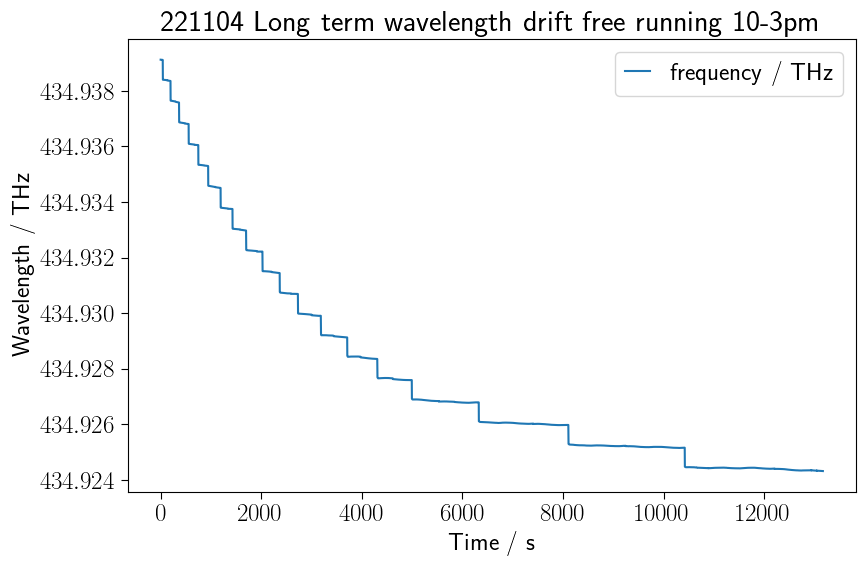

In [9]:
# Plot out

df.plot("time / s",
        "frequency / THz",
        figsize=(9,6),
        xlabel='Time / s',
        ylabel='Wavelength / THz',
        title='221104 Long term wavelength drift free running 10-3pm')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.tight_layout()
# plt.annotate('Drift = 0.04MHz/s',xy=(22000,434.92570))
# plt.annotate(' ',xy=(1000,434.9258), xytext=(10000,434.9251), arrowprops=dict(arrowstyle='<->'))
# plt.annotate('PI off',xy=(5000,434.9255))
# plt.annotate(' ',xy=(22500,434.9258), xytext=(25000,434.9257), arrowprops=dict(arrowstyle='<->'))
# plt.annotate('PI on',xy=(23000,434.9258))

plt.show()
# plt.savefig('221019 Long term wavelength drift with etalon lock'+'.png',bbox_inches='tight',dpi=300)

## Wavelength drift calculation

In [10]:
t1 = df.iloc[0,0] #time
t2 = df.iloc[-1,0]

# convert from nm to Hz

c = 299792458
f1 = c/(df.iloc[0,1]*1e-9) #freq
f2 = c/(df.iloc[-1,1]*1e-9)

In [11]:
drift_rate = (f1-f2)/(t2-t1)/1e6 #MHz/s
drift_rate  #MHz/s

1.1243693361099507